![Logo TUBAF](https://tu-freiberg.de/sites/default/files/media/freiberger-alumni-netzwerk-6127/wbm_orig_rgb_0.jpg)

Exercise material of the MSc-level course **Advanced Soil Mechanics**.
Held at Technische Universität Bergakademie Freiberg.

Comments to:

*Prof. Dr. Thomas Nagel  
Chair of Soil Mechanics and Foundation Engineering  
Geotechnical Institute  
Technische Universität Bergakademie Freiberg.*

https://tu-freiberg.de/en/fakultaet3/gt/soilmechanics


# Von Spannungen, Verzerrungen und Verschiebungen zu Setzungen -- indirekte Setzungsberechnungen und Verfahrensvergleiche

Ein weiteres Verfahren, dass sich insbesondere bei mit der Tiefe varrierenden Baugrundeigenschaften oder bei Vorhandensein von Spannungsmessungen oder -prognosen, die nicht aus den bisher behandelten geschlossenen Lösungen resultieren, eignet, sind die indirekten Setzungsberechnungen.

In [1]:
#HIDDEN
import numpy as np #numerical methods
import matplotlib.pyplot as plt #plotting
import seaborn as sns
import sympy as sp
from ipywidgets import widgets
from ipywidgets import interact
from ipywidgets import interactive
import pandas as pd
sp.init_printing(use_latex='mathjax') #makes sympy output look nice

#Some plot settings
import plot_functions.plot_settings
%run plot_functions/settlements_plots.ipynb
%run plot_functions/stresses_steinbrenner_plots.ipynb

Dafür wird der Baugrund in Schichten eingeteilt. Schichtgrenzen können bspw.

* geologisch vorgegeben sein;
* aus spannungsabhängigen Steifigkeitsänderungen resultieren;
* veränderliche Lagerungsdichten oder Konsistenzen widerspiegeln;
* durch die Berücksichtigung von Grundwasserständen (Wichte unter Auftrieb) notwendig werden.

Für jede Schicht wird mit Bezug auf ihre mittlere Tiefe

* die vertikale Überlagerungseffektivspannung vor Beginn der Baumaßnahme bestimmt;
* die effektive Vertikalspannungseröhung infolge der Baumaßnahme ermittelt (bspw. über die Methode der $i$ Beiwerte);
* der zur Ausgangsspannung und zum Spannungszuwachs gehörige Streifemodul als Sekantenmodul aus Druck-Setzungskurven bestimmt und daraus der Rechenmodul abgeleitet. 

Mit diesen Informationen kann für jede Schicht die Zusammendrückung (Teilsetzungsbeitrag) mittels

$$
    \Delta s_i = \frac{\Delta \sigma'_i}{E^*_i(\sigma'_{0,i},\Delta \sigma'_i)} h_i
$$

ermittelt werden.

Die Gesamtsetzung ergibt sich durch Summation über alle $n$ Schichten:

$$
    s = \sum \limits_{i=1}^n \Delta s_i
$$

## Vergleichende Analyse

Wir berechnen nun die Setzungen unter dem kennzeichnenden Punkt einer gleichförmigen Vertikalflächenlast $q_0 = 300\,$kPa mit Wirkungsfläche $6 \times 4\,$m², die aufgrund der Kompression einer 15 m mächtigen Schicht entstehen. Die Einbindetiefe $d$ sei Null. Die normalkonsolidierte Bodenschicht sei durch eine spannungsabhängige Steifigkeit (Tangentenmodul) gekennzeichnet:

$$
    E_\text{s} = E_\text{ref} \left(\frac{\sigma'}{\sigma_\text{ref}}\right)^{\omega_\text{e}}
$$

wobei wir $E_\text{ref} = E_\text{s}(\sigma_\text{ref} = 10\,\text{kPa} = 1\,\text{MPa}$ und $\omega_\mathrm{e} = 0.9$ setzen. Für alle Berechnungen verwenden wir $\nu = 0$ (Querkontraktionszahl) und die Wichte $\gamma = 16\,$kN$\,$m$^{-3}$. Das Spannungs-Dehnungsverhalten (Erstbelastung) sowie den Tangentensteifemodul stellt die folgende Abbildung dar.

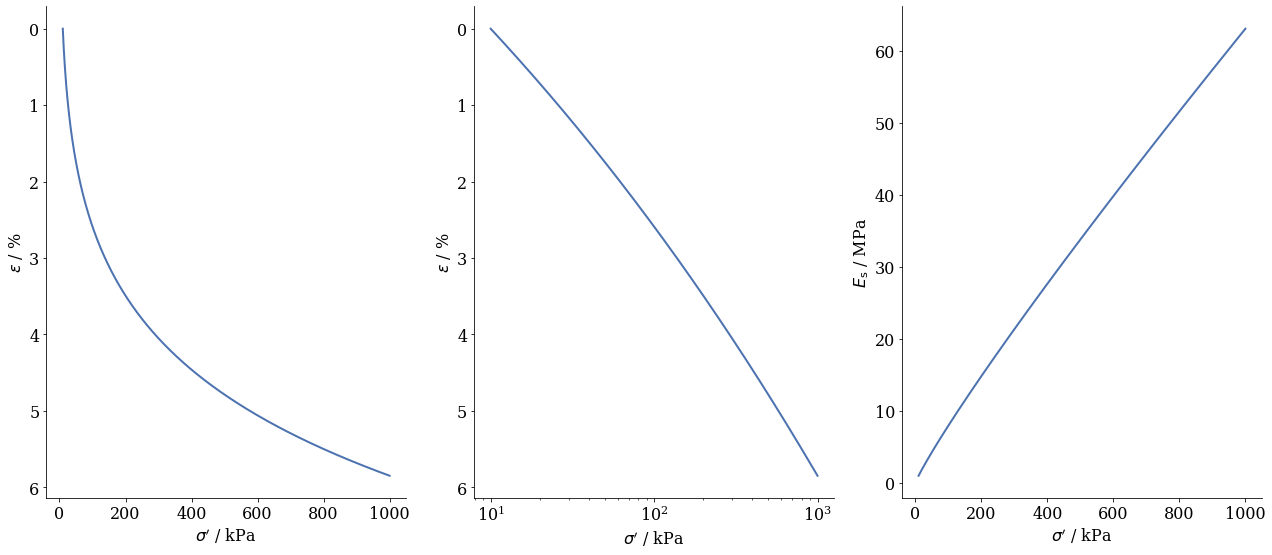

In [2]:
#HIDDEN
E_s = lambda sig, Eref, sigref, om: Eref * np.power(sig/sigref,om) #kPa
eps = lambda sig, Eref, sigref, om: sigref/((1-om)*Eref) * ( np.power(sig/sigref,1-om) -1 )
gamma = 16.
q0 = 300.
ts = 15.
a = 6
b = 4
plot_stiffness_input()

Die linke Graphik kann verwendet werden, um Sekantenmodule für bestimmte Spannungsintervalle abzuleiten. Im Folgenden wird die explizite Ausweisung effektiver Spannungen der Einfachheit halber wieder vernachlässigt.

In [3]:
#HIDDEN
interactive_secant()

interactive(children=(BoundedFloatText(value=100.0, description='$\\sigma_0$ / kPa', max=1000.0, min=10.0), Bo…

### Methode 1: Direkte Methode -- konstanter Steifemodul -- eine Schicht

Wir berechnen die Setzung mit der bereits bekannten Formel

$$
    s_\text{K} = \frac{q_0bf_\text{K}}{E^*}
$$

Dabei setzen wir

* den Bezug auf die Schichtmitte (Standardregel): $E^* = E_\text{s}^\text{sec}\left[\sigma_0 = \gamma \frac{t}{2}, \Delta \sigma = q_0 i_\text{K}\left(z = \frac{t}{2}\right)\right]$
* den Bezug auf den oberen Bereich der Schicht in 1 m Teufe: $E^* = E_\text{s}^\text{sec}\left[\sigma_0 = \sigma_\text{ref}, \Delta \sigma = q_0\right]$. Die Überlegung dazu leitet sich aus der mit 15 m sehr hohen Schichtdicke ab, die eine starke Konzentration der setzungsrelevanten Spannungszuwächse auf den oberen Bereich der Schicht nahelegt.

Die folgende Abbildung illustriert zunächst die Abweichung des Sekantenmoduls und des Tangentenmoduls.

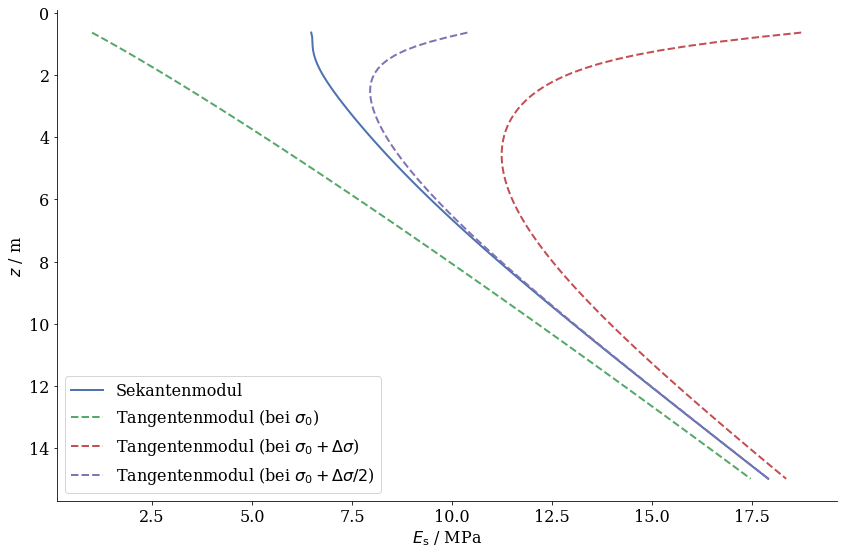

In [4]:
#HIDDEN
plot_secant_tangent()

In [5]:
#HIDDEN
E_mid = get_secant(gamma*ts/2,q0*i_K_Rechteck(ts/2,a,b))
E_top = get_secant(gamma*1,q0*i_K_Rechteck(1,a,b))
print("Der Steifemodul (Sekante) mit Bezug zur Schichtmitte (7.5 m Tiefe) beträgt %.2f MPa" %(E_mid/1e3))
print("Der Steifemodul (Sekante) mit Bezug zur Schichtoberkante (1 m Tiefe) beträgt %.2f MPa" %(E_top/1e3))

Der Steifemodul (Sekante) mit Bezug zur Schichtmitte (7.5 m Tiefe) beträgt 10.73 MPa
Der Steifemodul (Sekante) mit Bezug zur Schichtoberkante (1 m Tiefe) beträgt 6.51 MPa


In [6]:
#HIDDEN
sK_mid = q0*b/E_mid * fK(ts,a,b,0)
sK_top = q0*b/E_top * fK(ts,a,b,0)
print("Die Setzung unter Verwendung des Steifemoduls (Sekante) mit Bezug zur Schichtmitte beträgt %.2f cm" %(sK_mid*100))
print("Die Setzung unter Verwendung des Steifemoduls (Sekante) mit Bezug zur Schichtoberkante (1 m Tiefe) beträgt %.2f cm" %(sK_top*100))

Die Setzung unter Verwendung des Steifemoduls (Sekante) mit Bezug zur Schichtmitte beträgt 9.61 cm
Die Setzung unter Verwendung des Steifemoduls (Sekante) mit Bezug zur Schichtoberkante (1 m Tiefe) beträgt 15.83 cm


### Methode 2 -- Direkte Methode -- Berechnung mit Teilschichten

Zur besseren Berücksichtigung der Nichtlinearität des Bodenverhaltens wird der Baugrund nun in $n$ Schichten eingeteilt. Bei der direkten Methoden kommt dann folgende Formel zur Anwendung:

$$
    s = q_0 b \left( \frac{f_1}{E_1^*} + \sum \limits_{i=2}^n \frac{f_i - f_{i-1}}{E_i^*} \right)
$$

Wir berechnen dann die Setzungsbeiwerte $f_i$ für die Schichtunterkanten und verwenden die Sekantenmoduln in den Schichtmitten als Rechenmoduln $E_i^*$. Die folgende interaktive Tabelle verdeutlicht den Rechenablauf und dient der Einschätzung des Einflusses der Schichtenanzahl auf die Setzungsbeträge (Achtung: die Zählung beginnt in der Tabelle abweichend zur obigen Formel bei 0).

**Aufgabe:** Wie viele Schichten sind als Einteilung in diesem Beispiel sinnvoll? Wie könnte man die Genauigkeit bei einer geringen Anzahl von Schichten durch eine veränderte Wahl der Schichtgrenzen weiter verbessern? Weisen Sie Ihre Hypothese für $n=3$ per Handrechnung nach.

In [7]:
#HIDDEN
interactive_direct_layers()

interactive(children=(IntSlider(value=3, description='$n$', max=15, min=1), Output()), _dom_classes=('widget-i…

### Methode 3 -- Indirekte Methode -- Berechnung mit Teilschichten

Wir verwenden nun die Formel

$$
    s = \sum \limits_{i=1}^n \frac{\Delta \sigma'_i}{E^*_i(\sigma'_{0,i},\Delta \sigma'_i)} h_i
$$

zur Setzungsberechnung. Der Ablauf ist folgt einem ähnlichen Schema wie Methode 2. Die Spannungszuwächse in den Schichtmitten ermitteln wir mittels

$$
    \Delta \sigma_i = q_0 i_\text{K}(z=z_\text{m})
$$

**Aufgabe:** Wie viele Schichten sind als Einteilung in diesem Beispiel sinnvoll? Worin liegt der Unterschied begründet? Weisen Sie auch hier ihre Hypothese zur Schichteinteilung durch Handrechnung nach. Verwenden Sie dazu $n=5$.

In [8]:
#HIDDEN
interactive_indirect_layers()

interactive(children=(IntSlider(value=3, description='$n$', max=15, min=1), Output()), _dom_classes=('widget-i…